In [156]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals



%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
# These steps are typically always called.  The "matplotlib inline" is to display figures in this notebook itself 


import pandas as pd 
# pandas is a library for handling datasets; you will see some useful built-in functions in action

import os # to move around your operating system

import scipy as sp  # scientific computation library

from mpl_toolkits.mplot3d import axes3d # in case we need to plot in 3D z=f(x,y)
import seaborn as sns  # another package for pretty graphs

# Scikit-learn (sklearn) is a powerful and fairly comprehensive library of ML algorithms

from sklearn import datasets
from sklearn.neighbors.kde import KernelDensity

In [158]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals
%matplotlib inline 
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from sklearn import datasets

In [159]:
def gradientdescent(Amat, y, winit, rate, numiter):
    n, p = Amat.shape
    whistory = []
    losshistory = [] 
    w = winit
    for i in range(numiter): 
        loss = np.square(y-Amat.dot(w)).mean()
        whistory.append(w)
        losshistory.append(loss)
        grad = (-2/n)*Amat.T.dot((y-Amat.dot(w)))
        w = w - rate*grad
    return w, np.asarray(whistory), np.asarray(losshistory)

In [160]:
# create small training data set ##########################
import math

def f(x):
    return math.sin(x)
ntrain=100
np.random.seed(0)
X=np.linspace(0,1,ntrain)
Xpi=2*math.pi*(X)
Xsq = Xpi
y = []
for num in Xpi:
    y.append(f(num)+0.03*np.random.normal(0,1))

y0 = np.array(y)

In [161]:
y0.shape

(100,)

Enter Degree: 1


Text(0,0.5,'loss')

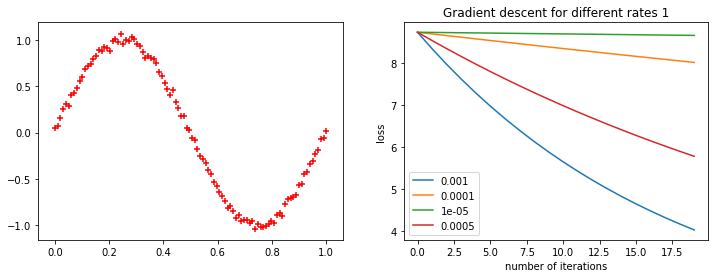

In [163]:
##################################################
# create design matix to fit a quadratic function 
Aquad=np.stack((np.ones(ntrain),Xpi)).T
deg = input("Enter Degree: ")
# for predictions on range of inputs ##########################
ntest=50
Xtest=np.linspace(0,1,ntest)
Xtestpi=2*math.pi*(Xtest)

Alin = np.stack((np.ones(ntest),Xtestpi)).T

n, p = Aquad.shape
w0 = np.random.randn(p)
rates = [.001,0.0001, 0.00001, 0.0005]
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(12,4))
ax[0].scatter(X,y0,marker='+',color='r')
for i, r in enumerate(rates):
    ax[1].plot(gradientdescent(Aquad, y0,  w0, r, 20)[2],label=r)
ax[1].legend() 
ax[1].set_title("Gradient descent for different rates"+ " "+deg)
ax[1].set_xlabel("number of iterations")
ax[1].set_ylabel("loss")

In [164]:
y0

array([ 0.05292157,  0.07542864,  0.15595459,  0.25647804,  0.30717473,
        0.28271511,  0.40016511,  0.4252542 ,  0.48310017,  0.55295877,
        0.59722924,  0.68641581,  0.71291014,  0.73824196,  0.78946236,
        0.82458618,  0.8945478 ,  0.87529862,  0.91902403,  0.90852499,
        0.87831255,  0.99142013,  1.01074084,  0.97157351,  1.06695998,
        0.95624316,  0.99822753,  0.98420593,  1.02478582,  1.00792292,
        0.94964924,  0.93369917,  0.8693602 ,  0.80660151,  0.82213249,
        0.80045231,  0.79265829,  0.74876557,  0.6551492 ,  0.6090899 ,
        0.53560327,  0.47107685,  0.40703842,  0.4594538 ,  0.32673058,
        0.26859033,  0.18272667,  0.18132611,  0.04663911,  0.02534573,
       -0.05859193, -0.08344897, -0.17332555, -0.2557295 , -0.28257802,
       -0.32917019, -0.39893502, -0.44915236, -0.53270705, -0.5779421 ,
       -0.6383328 , -0.6775556 , -0.73708856, -0.80753805, -0.79043906,
       -0.84462328, -0.91493135, -0.88211031, -0.94957325, -0.94

In [166]:
def reg_gradientdescent(w, X, y, l1, l2, core=1, rate = 0.1, n_iterations = 50):
    wtseq = [w]
    for iteration in range(n_iterations):
        gradients =  core*2/len(X) * X.T.dot(X.dot(w) - y) + \
                    l1 * np.sign(w) + 2 * l2 * w

        w = w - rate * gradients
        wtseq.append(w)
    return np.array(wtseq)

In [168]:
# This is taken from Aurelion Gueron's "Hands-on Machine Learning with Scikit-Learn and TensorFlow"

t1a, t1b, t2a, t2b = -1, 3, -1.5, 1.5

# ignoring bias term
t1s = np.linspace(t1a, t1b, 500)
t2s = np.linspace(t2a, t2b, 500)
t1, t2 = np.meshgrid(t1s, t2s)

T = np.c_[t1.ravel(), t2.ravel()]

Xr = np.array([[-1, 1], [-0.3, -1], [1, 0.1]])  # input 
yr = 2.5 * Xr[:, :1] + 0.5 * Xr[:, 1:] # outputs, with best-fit weights (w_1, w_2) = (2.5, 0.5) 


# mean sum of squares of the residuals; the contours of this will be drawn as ellipses below
J = (1/len(Xr) * np.sum((T.dot(Xr.T) - yr.T)**2, axis=1)).reshape(t1.shape) 


# these are the norms to be added as regularisation terms to the loss J
N1 = np.linalg.norm(T, ord=1, axis=1).reshape(t1.shape)
N2 = np.linalg.norm(T, ord=2, axis=1).reshape(t1.shape)

t_min_idx = np.unravel_index(np.argmin(J), J.shape)
t1_min, t2_min = t1[t_min_idx], t2[t_min_idx] # unregularised minimum of loss (2.5, 0.5)

wt_init = np.array([[-0.5], [-1]]) # initial weights 

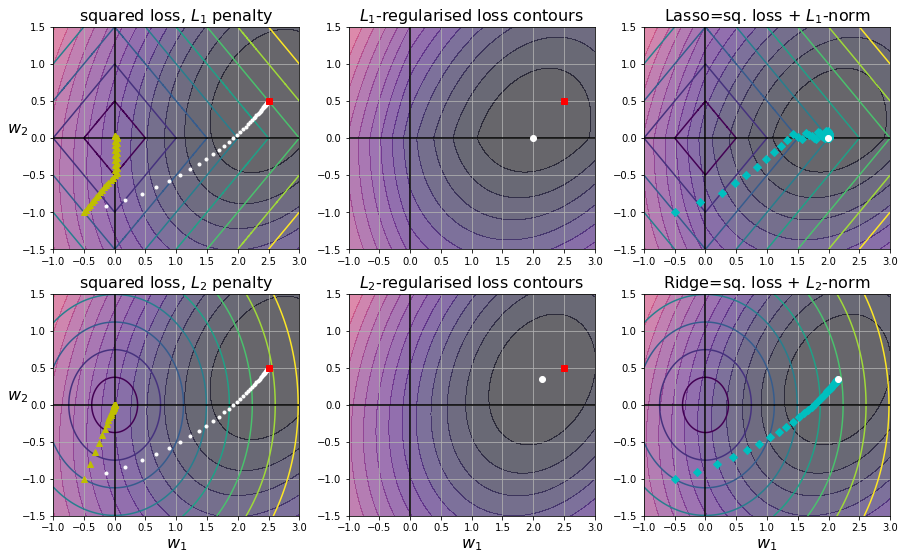

In [169]:

fig, ax = plt.subplots(nrows=2, ncols=3,figsize=(15,9))

for i, N, l1, l2, title in ((0, N1, 0.5, 0, "Lasso=sq. loss + $L_1$-norm"),\
                            (1, N2, 0,  0.1, "Ridge=sq. loss + $L_2$-norm")):
    JR = J + l1 * N1 + l2 * N2**2  
    # note that if l1 = 0.5, l2 = 0 making JR = J + 0.5*N1 loss plus L1 regulariser (Lasso)
    # and if l2 = 0.1, l1 = 0 making JR = J + 0.1*N2 loss plus L2 regulariser (Ridge regression)
    
    wt_min_idx = np.unravel_index(np.argmin(JR), JR.shape)
    t1r_min, t2r_min = t1[wt_min_idx], t2[wt_min_idx]

    levelsJ=(np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(J) - np.min(J)) + np.min(J)
    levelsJR=(np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(JR) - np.min(JR)) + np.min(JR)
    levelsN=np.linspace(0, np.max(N), 10)
    
    path_J = reg_gradientdescent(wt_init, Xr, yr, l1=0, l2=0)  
    path_JR = reg_gradientdescent(wt_init, Xr, yr, l1, l2)
    path_N = reg_gradientdescent(wt_init, Xr, yr, np.sign(l1)/3, np.sign(l2), core=0)

    
    
    ax[i,0].grid(True)
    ax[i,0].axhline(y=0, color='k')
    ax[i,0].axvline(x=0, color='k')
    ax[i,0].contourf(t1, t2, J, levels=levelsJ, alpha=0.6,cmap=plt.cm.magma)
    ax[i,0].contour(t1, t2, N, levels=levelsN)
    ax[i,0].plot(path_J[:, 0], path_J[:, 1], "w.")
    ax[i,0].plot(path_N[:, 0], path_N[:, 1], "y^")
    ax[i,0].plot(t1_min, t2_min, "rs") # minimum of unregularised loss shown as a red square
    ax[i,0].set_title(r"squared loss, $L_{}$ penalty".format(i + 1), fontsize=16)
    ax[i,0].axis([t1a, t1b, t2a, t2b])


    ax[i,1].grid(True)
    ax[i,1].axhline(y=0, color='k')
    ax[i,1].axvline(x=0, color='k')
    ax[i,1].contourf(t1, t2, JR, levels=levelsJR, alpha=0.6,cmap=plt.cm.magma)
    ax[i,1].plot(t1_min, t2_min, "rs")  # minimum of unregularised loss as red square
    ax[i,1].plot(t1r_min, t2r_min, "wo") # minimum of regularised loss as white circle
    ax[i,1].set_title(r"$L_{}$-regularised loss contours".format(i+1), fontsize=16)
    ax[i,1].axis([t1a, t1b, t2a, t2b])

    
    ax[i,2].grid(True)
    ax[i,2].axhline(y=0, color='k')
    ax[i,2].axvline(x=0, color='k')
    ax[i,2].contourf(t1, t2, JR, levels=levelsJR, alpha=0.6,cmap=plt.cm.magma)
    ax[i,2].contour(t1, t2, N, levels=levelsN)
    ax[i,2].plot(path_JR[:, 0], path_JR[:, 1], "cD")
    ax[i,2].plot(t1r_min, t2r_min, "wo")
    ax[i,2].set_title(title, fontsize=16)
    ax[i,2].axis([t1a, t1b, t2a, t2b])
    
for i in range(2):
    ax[i,0].set_ylabel(r"$w_2$", fontsize=16, rotation=0)
ax[1,0].set_xlabel(r"$w_1$", fontsize=16)
ax[1,1].set_xlabel(r"$w_1$", fontsize=16)
ax[1,2].set_xlabel(r"$w_1$", fontsize=16)



plt.show()